In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1**.Loading the Dataset

In [73]:
data = pd.read_csv("/content/titanic_dataset .csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**2**.Preprocessing

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.set_index('PassengerId', inplace=True)

In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


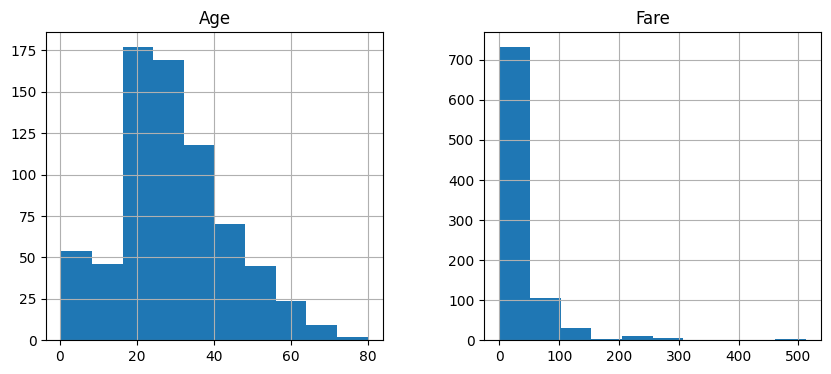

In [9]:
freqgraph = data.select_dtypes(include='float64')
freqgraph.hist(figsize=(10,4));

In [234]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'].fillna('Unknown',inplace=True)


In [235]:
data.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             0
Name_LabelEncoded    0
Sex_LabelEncoded     0
dtype: int64

In [12]:
num_cols = ['Age','Fare','SibSp']

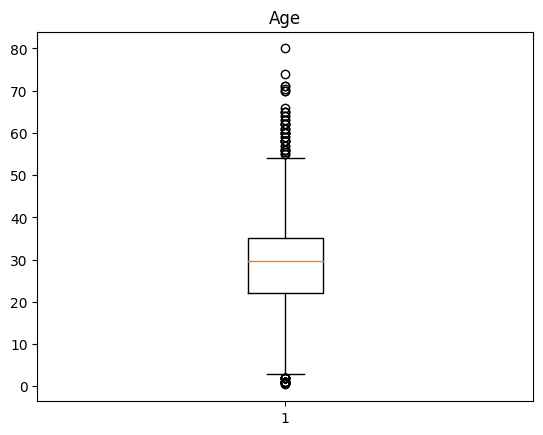

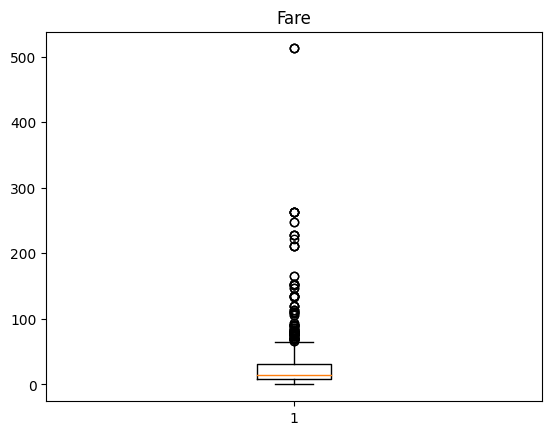

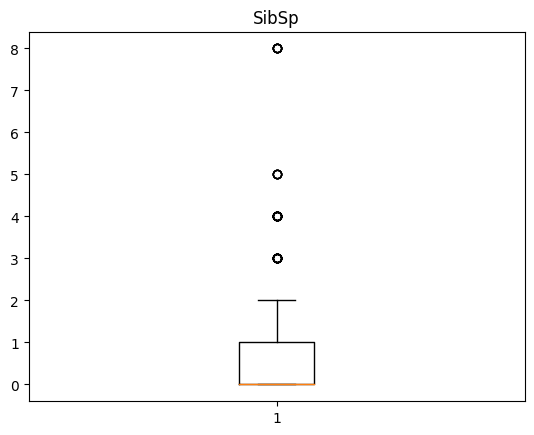

In [13]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [14]:
Q1 = np.percentile(data['Age'],25,method='midpoint')
Q2 = np.percentile(data['Age'],50,method='midpoint')
Q3 = np.percentile(data['Age'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  22.0
Q2 is  29.69911764705882
Q3 is  35.0


In [15]:
IQR = Q3-Q1

print('IQR is ',IQR)

IQR is  13.0


In [16]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5*IQR

print('lower limit is',low_lim)
print('upper limit is',up_lim)

lower limit is 2.5
upper limit is 54.5


In [17]:
outlier = []
for x in data['Age']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [18]:
data['Age'] = data['Age'].clip(lower=low_lim, upper=up_lim)

In [19]:
outlier = []
for x in data['Age']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[]

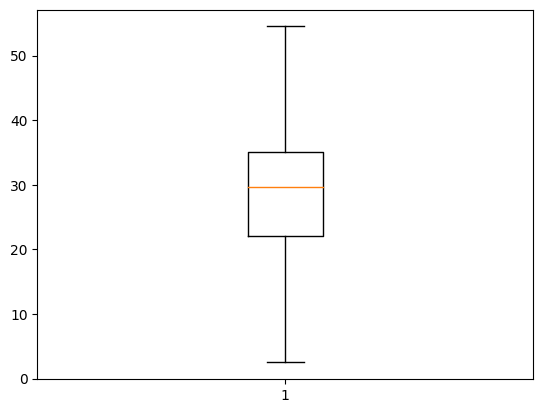

In [20]:
plt.boxplot(data['Age'])
plt.show();

In [21]:
Q1 = np.percentile(data['Fare'],25,method='midpoint')
Q2 = np.percentile(data['Fare'],50,method='midpoint')
Q3 = np.percentile(data['Fare'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  7.9104
Q2 is  14.4542
Q3 is  31.0


In [22]:
IQR = Q3-Q1

print('IQR is ',IQR)

IQR is  23.0896


In [23]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5*IQR

print('lower limit is',low_lim)
print('upper limit is',up_lim)

lower limit is -26.724
upper limit is 65.6344


In [24]:
outlier = []
for x in data['Fare']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [25]:
data['Fare'] = data['Fare'].clip(lower=low_lim, upper=up_lim)

In [26]:
outlier = []
for x in data['Fare']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[]

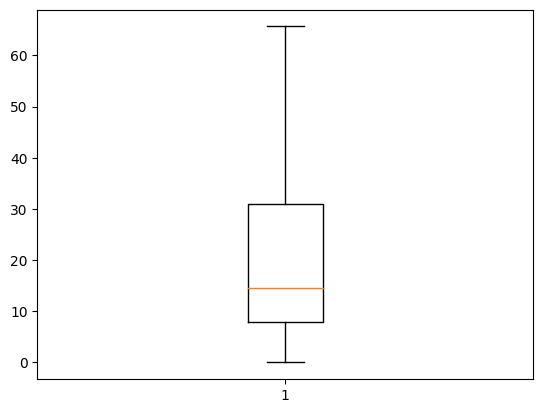

In [27]:
plt.boxplot(data['Fare'])
plt.show();

In [28]:
Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q2 = np.percentile(data['SibSp'],50,method='midpoint')
Q3 = np.percentile(data['SibSp'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  0.0
Q2 is  0.0
Q3 is  1.0


In [29]:
IQR = Q3-Q1

print('IQR is ',IQR)

IQR is  1.0


In [30]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5*IQR

print('lower limit is',low_lim)
print('upper limit is',up_lim)

lower limit is -1.5
upper limit is 2.5


In [31]:
outlier = []
for x in data['SibSp']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [32]:
data['SibSp'] = data['SibSp'].clip(lower=low_lim, upper=up_lim)

In [33]:
outlier = []
for x in data['SibSp']:
  if (x > up_lim) or (x < low_lim):
    outlier.append(x)

outlier

[]

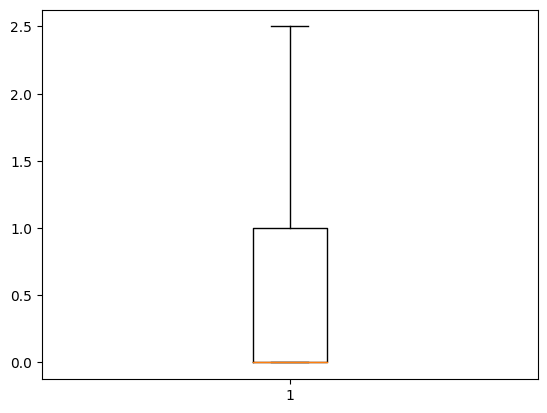

In [34]:
plt.boxplot(data['SibSp'])
plt.show();

In [259]:
y = data[['Survived']]
X = data.drop(['Survived'],axis = 1)

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.30)

In [261]:
X_train.shape

(623, 10)

In [262]:
y_train.shape

(623, 1)

In [263]:
X_test.shape

(268, 10)

In [264]:
y_test.shape

(268, 1)

In [153]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_LabelEncoded,Sex_LabelEncoded
0,1,0,3,1,22.0,1,0,7.2500,S,108.0,1.0
1,2,1,1,2,38.0,1,0,71.2833,C,190.0,0.0
2,3,1,3,2,26.0,0,0,7.9250,S,353.0,0.0
3,4,1,1,2,35.0,1,0,53.1000,S,272.0,0.0
4,5,0,3,1,35.0,0,0,8.0500,S,15.0,1.0


In [79]:
from sklearn.preprocessing import OneHotEncoder

one_hot_en = OneHotEncoder(sparse_output=False)

In [80]:
onehot_encoded = one_hot_en.fit_transform(data[['Name']])

In [281]:
print("\:OneHotEncoder")
print(onehot_encoded)

\:OneHotEncoder
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [112]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [122]:
data['Sex'].replace({'male':1,'female':2},inplace=True)

In [155]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [156]:
data['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)

In [220]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_LabelEncoded,Sex_LabelEncoded
0,1,0,3,1,22.0,1,0,7.2500,1.0,108.0,1.0
1,2,1,1,2,38.0,1,0,71.2833,2.0,190.0,0.0
2,3,1,3,2,26.0,0,0,7.9250,1.0,353.0,0.0
3,4,1,1,2,35.0,1,0,53.1000,1.0,272.0,0.0
4,5,0,3,1,35.0,0,0,8.0500,1.0,15.0,1.0


In [210]:
data['Fare'].replace('Unknown', np.nan, inplace=True)

In [211]:
data['SibSp'].replace('Unknown', np.nan, inplace=True)

In [244]:
for column in data.columns:
  try:
      data[column].astype(float)
  except ValueError as e:
    print(f"Error '{column}': {e}")


Error 'Embarked': could not convert string to float: 'Unknown'


In [246]:
data['Embarked'].replace('Unknown', np.nan, inplace=True)

In [231]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [248]:
data['Embarked'].value_counts()

Embarked
1.0    644
2.0    168
3.0     77
Name: count, dtype: int64

In [249]:
data['Embarked'].isna().sum()

2

In [254]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mean())

In [258]:
data['Embarked'].isna().sum()

0

In [257]:
for column in data.columns:
  try:
      data[column].astype(float)
  except ValueError as e:
    print(f"Error '{column}': {e}")


In [265]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [266]:
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score,f1_score,precision_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('F1 is', f1_score(y_test, y_pred))

Accuracy is 0.7947761194029851
Precision is 0.7745098039215687
Recall is 0.7117117117117117
F1 is 0.7417840375586854


In [267]:
confusion_matrix(y_test,y_pred)

array([[134,  23],
       [ 32,  79]])

**3**.KNN and SVM

KNN Algorith

In [268]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[0.6343283582089553,
 0.6268656716417911,
 0.6082089552238806,
 0.6305970149253731,
 0.6007462686567164,
 0.6156716417910447,
 0.6082089552238806,
 0.6044776119402985,
 0.6044776119402985,
 0.5895522388059702,
 0.5970149253731343,
 0.585820895522388]

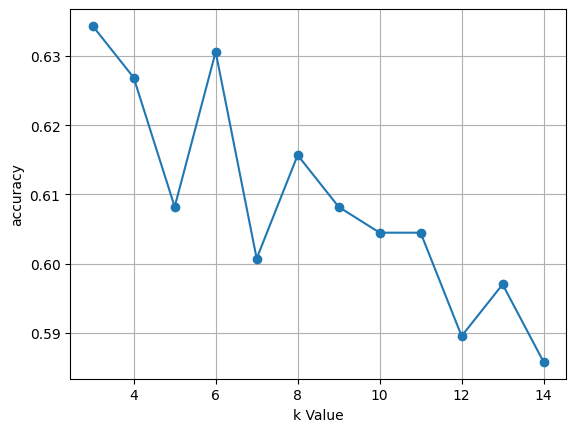

In [269]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [270]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn))
print('Recall is', recall_score(y_test, y_pred_knn))
print('F1 Score is', f1_score(y_test, y_pred_knn))

Accuracy is 0.6082089552238806
Precision is 0.53
Recall is 0.4774774774774775
F1 Score is 0.5023696682464456


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


SVM

In [271]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_svm_prediction = svm_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [272]:
print(confusion_matrix(y_test,y_svm_prediction))

[[133  24]
 [ 33  78]]


In [273]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))

accuracy score 0.7873134328358209


In [274]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='poly')
svm_clf.fit(X_train, y_train)
y_svm_prediction = svm_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [275]:
print(confusion_matrix(y_test,y_svm_prediction))

[[154   3]
 [102   9]]


In [276]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))

accuracy score 0.6082089552238806


In [277]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_svm_prediction = svm_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [278]:
print(confusion_matrix(y_test,y_svm_prediction))

[[154   3]
 [105   6]]


In [279]:
print("accuracy score",accuracy_score(y_test,y_svm_prediction))

accuracy score 0.5970149253731343


**4**. Average accuracy

In [306]:
X = data[['Pclass','SibSp','Parch','Sex','Age',]]
y = data.Survived

In [307]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [308]:
X.head(7)

,Pclass,SibSp,Parch,Sex,Age
0,3,1,0,1,22.000000
1,1,1,0,2,38.000000
2,3,0,0,2,26.000000
3,1,1,0,2,35.000000
4,3,0,0,1,35.000000
5,3,0,0,1,29.699118
6,1,0,0,1,54.000000


In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [312]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [313]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7982062780269058

In [314]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits = 10)

In [315]:
for train_index, test_index in kf.split(X,y):
  print('Training index: ',train_index)
  print('Testing index: ',test_index)

Training index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [316]:
score = cross_val_score(model, X,y, cv=kf)
print('Cross validation scores are {} '.format(score))

Cross validation scores are [0.8        0.80898876 0.76404494 0.78651685 0.78651685 0.76404494
 0.78651685 0.75280899 0.83146067 0.79775281] 


In [317]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits = 10)

In [318]:
for train_index, test_index in skfold_validator.split(X,y):
  print('Training index: ',train_index)
  print('Testing index: ',test_index)

Training index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [319]:
skcv_result = cross_val_score(model, X,y, cv=skfold_validator)
skcv_result

array([0.81111111, 0.78651685, 0.74157303, 0.83146067, 0.79775281,
       0.76404494, 0.7752809 , 0.76404494, 0.79775281, 0.79775281])

In [320]:
print("Average cross validation score : {}".format(skcv_result.mean()))

Average cross validation score : 0.7867290886392009
